In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# データのロード
iris_df = pd.read_csv(filepath_or_buffer="/content/drive/My Drive/ensyu3/iris.csv")
display(iris_df.head())

In [ ]:
#目的変数の設定
obj_var = 'Species'

#説明変数と目的変数に分ける
iris_df_X = iris_df.drop(obj_var,axis=1) #説明変数（目的変数以外)
iris_df_y = iris_df[obj_var]             #目的変数

#データを分割
train_X, test_X, train_y, test_y = \
  train_test_split(iris_df_X, iris_df_y, test_size=0.3, stratify = iris_df_y,random_state=0)

In [ ]:
#決定木の生成
dtc = DecisionTreeClassifier()
dtc.fit(train_X,train_y)

In [ ]:
#テストデータで正解率確認
pred_y = dtc.predict(test_X)
accuracy_score(test_y,pred_y)

In [ ]:
#確認
result = pd.DataFrame(test_y)
result["pred"] = pred_y

display(result)

In [ ]:
#決定木の表示
from sklearn import tree
import pydotplus
from IPython.display import Image
from graphviz import Digraph

dot_data = tree.export_graphviz(
    dtc,
    out_file=None,
    feature_names=iris_df_X.columns.values,
    filled=True,
    proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# ランダムフォレストモデルを生成
# n_estimators 決定木をいくつ生成するか（デフォルトは10）
clf = RandomForestClassifier(random_state=0, n_estimators=10)
clf = clf.fit(train_X, train_y)

# 結果検証
rdf_y_pred = clf.predict(test_X)
accuracy_score(test_y,rdf_y_pred)

In [ ]:
result = pd.DataFrame(test_y)
result["pred"] = rdf_y_pred

display(result)

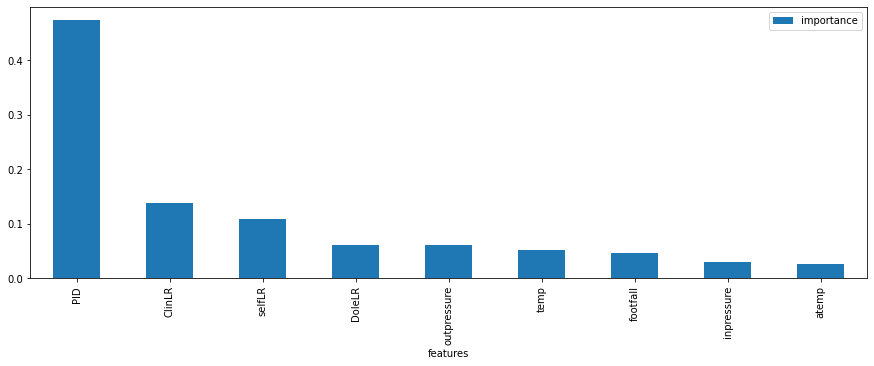

In [5]:
import matplotlib.pyplot as plt

#特徴量の重要度を表示
clf = clf.fit(train_X, train_y)

default_imp=pd.DataFrame(data={'importance':clf.feature_importances_,'features':train_X.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp=default_imp[:30]
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()

In [ ]:
#borutaのインストール
pip install boruta

In [ ]:
import numpy as np
#１００列分のダミーデータを追加
df_lie = pd.DataFrame(np.random.randint(0,10,size=(150, 100)), columns=['dummy']*100) 
iris_df_L = pd.concat([iris_df, df_lie], axis=1)
display(iris_df_L.head())

In [ ]:
#borutaで、特徴量の抽出
from boruta import BorutaPy

rf = RandomForestClassifier(random_state=0, n_estimators=10)

iris_dfL_X = iris_df_L.drop(obj_var,axis=1) #説明変数（目的変数以外)
iris_dfL_y = iris_df_L[obj_var]             #目的変数

(trainL_X, testL_X, trainL_y, testL_y) = train_test_split(
    iris_dfL_X, iris_dfL_y, test_size=0.3, random_state=0)

feat_selector = BorutaPy(rf, 
                         n_estimators='auto',  # 特徴量の数に比例して、木の本数を増やす
                         verbose=2, # 0: no output,1: displays iteration number,2: which features have been selected already
                         alpha=0.05, # 有意水準
                         max_iter=10, # 試行回数
                         random_state=1
                        )

# 実行
feat_selector.fit(trainL_X.values, trainL_y.values)

In [ ]:
print(feat_selector.support_)

In [ ]:
train_X_selected = trainL_X.iloc[:,feat_selector.support_]
test_X_selected = testL_X.iloc[:,feat_selector.support_]
display(train_X_selected.head())
display(test_X_selected.head())

In [3]:
#機械の故障予測
#データの読み込み
df_i = pd.read_csv(filepath_or_buffer="/content/drive/My Drive/ensyu3/iot.csv")

#目的変数の設定
objective_variable = 'fail'

#説明変数と目的変数に分ける
df_X = df_i.drop(objective_variable,axis=1)
df_y = df_i[objective_variable]

# トレーニングデータとテストデータに分ける
(train_X, test_X, train_y, test_y) = train_test_split(
    df_X, df_y, test_size=0.3, random_state=0)

# ランダムフォレストモデルを生成
# n_estimators 決定木をいくつ生成するか（デフォルトは10）
clf = RandomForestClassifier(random_state=0, n_estimators=10)
clf = clf.fit(train_X, train_y)

# 結果検証
rdf_y_pred = clf.predict(test_X)
accuracy_score(test_y,rdf_y_pred)

0.9225352112676056

NameError: ignored

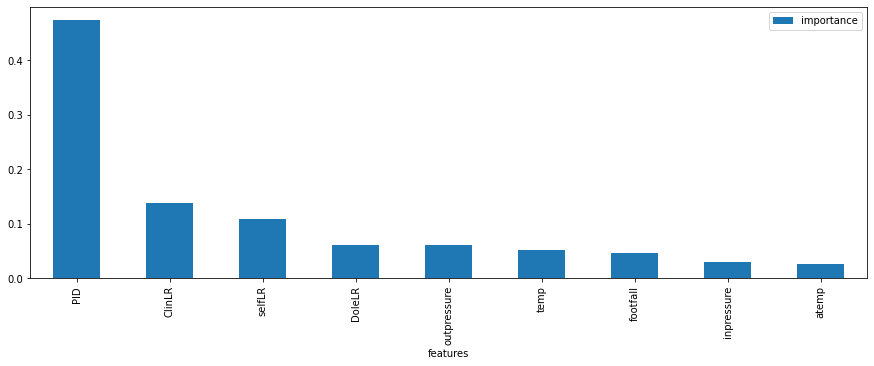

In [4]:
#特徴量の重要度を表示
clf = clf.fit(train_X, train_y)

default_imp=pd.DataFrame(data={'importance':clf.feature_importances_,'features':train_X.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp=default_imp[:30]
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()